In [36]:
import tensorflow as tf
import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import seaborn as sns
raw_data=pd.read_csv('C:/Users/Paa Kwasi/Desktop/Density.csv')
raw_data.columns

Index(['Pressure', 'Temperature', 'DW_11ppg', 'DW_14ppg', 'DW_18ppg',
       'DO_11ppg', 'DO_14ppg', 'DO_18ppg'],
      dtype='object')

In [13]:
raw=raw_data[['Pressure', 'Temperature','DW_18ppg']]

In [14]:
raw

,Pressure,Temperature,DW_18ppg
0,0,70,17.96
1,0,100,17.93
2,0,150,17.81
3,0,200,17.60
4,0,250,17.34
5,0,300,17.05
6,2000,70,18.16
7,2000,100,18.11
8,2000,150,17.97
9,2000,200,17.73


# Checking for significant correlation

<AxesSubplot:>

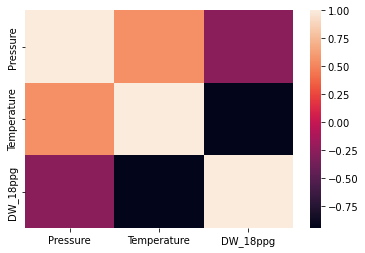

In [15]:
raw.corr()
sns.heatmap(raw_data.corr())

# Checking for the outliers

<AxesSubplot:xlabel='DW_18ppg'>

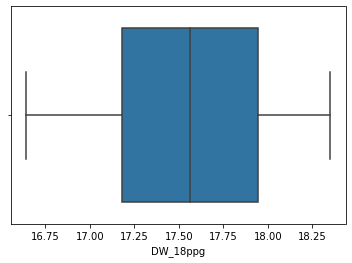

In [16]:
sns.boxplot(data=raw_data,x=raw['DW_18ppg'])

In [83]:
model=Sequential([
    Dense(units=45,activation='relu',kernel_regularizer=regularizers.L2(0.001)),
    Dense(units=30,activation='relu',kernel_regularizer=regularizers.L2(0.001)),
    Dense(units=1,activation='linear',kernel_regularizer=regularizers.L2(0.001))
])
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.001), metrics=['mean_squared_error'])

In [84]:
X=raw.drop(['DW_18ppg'],axis=1)
y=raw['DW_18ppg']

In [85]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [86]:
model.fit(X_train,y_train,epochs=10000)

Epoch 1/10000
1/1 [==============================] - 1s 758ms/step - loss: 304.6539 - mean_squared_error: 304.6121
Epoch 2/10000
1/1 [==============================] - 0s 6ms/step - loss: 304.0002 - mean_squared_error: 303.9586
Epoch 3/10000
1/1 [==============================] - 0s 13ms/step - loss: 303.3646 - mean_squared_error: 303.3232
Epoch 4/10000
1/1 [==============================] - 0s 15ms/step - loss: 302.7408 - mean_squared_error: 302.6996
Epoch 5/10000
1/1 [==============================] - 0s 12ms/step - loss: 302.1111 - mean_squared_error: 302.0703
Epoch 6/10000
1/1 [==============================] - 0s 6ms/step - loss: 301.4740 - mean_squared_error: 301.4333
Epoch 7/10000
1/1 [==============================] - 0s 6ms/step - loss: 300.8299 - mean_squared_error: 300.7894
Epoch 8/10000
1/1 [==============================] - 0s 6ms/step - loss: 300.1791 - mean_squared_error: 300.1389
Epoch 9/10000
1/1 [==============================] - 0s 9ms/step - loss: 299.5196 - mean_sq

1/1 [==============================] - 0s 4ms/step - loss: 220.0205 - mean_squared_error: 219.9868
Epoch 73/10000
1/1 [==============================] - 0s 6ms/step - loss: 217.8314 - mean_squared_error: 217.7977
Epoch 74/10000
1/1 [==============================] - 0s 8ms/step - loss: 215.6097 - mean_squared_error: 215.5761
Epoch 75/10000
1/1 [==============================] - 0s 6ms/step - loss: 213.3540 - mean_squared_error: 213.3203
Epoch 76/10000
1/1 [==============================] - 0s 6ms/step - loss: 211.0654 - mean_squared_error: 211.0316
Epoch 77/10000
1/1 [==============================] - 0s 5ms/step - loss: 208.7444 - mean_squared_error: 208.7107
Epoch 78/10000
1/1 [==============================] - 0s 7ms/step - loss: 206.3918 - mean_squared_error: 206.3581
Epoch 79/10000
1/1 [==============================] - 0s 6ms/step - loss: 204.0057 - mean_squared_error: 203.9719
Epoch 80/10000
1/1 [==============================] - 0s 13ms/step - loss: 201.5876 - mean_squared_erro

1/1 [==============================] - 0s 7ms/step - loss: 41.7733 - mean_squared_error: 41.7317
Epoch 145/10000
1/1 [==============================] - 0s 5ms/step - loss: 40.5560 - mean_squared_error: 40.5143
Epoch 146/10000
1/1 [==============================] - 0s 5ms/step - loss: 39.4044 - mean_squared_error: 39.3626
Epoch 147/10000
1/1 [==============================] - 0s 7ms/step - loss: 38.3181 - mean_squared_error: 38.2761
Epoch 148/10000
1/1 [==============================] - 0s 6ms/step - loss: 37.2951 - mean_squared_error: 37.2530
Epoch 149/10000
1/1 [==============================] - 0s 5ms/step - loss: 36.3352 - mean_squared_error: 36.2929
Epoch 150/10000
1/1 [==============================] - 0s 6ms/step - loss: 35.4364 - mean_squared_error: 35.3940
Epoch 151/10000
1/1 [==============================] - 0s 6ms/step - loss: 34.5965 - mean_squared_error: 34.5540
Epoch 152/10000
1/1 [==============================] - 0s 7ms/step - loss: 33.8141 - mean_squared_error: 33.7715

1/1 [==============================] - 0s 6ms/step - loss: 22.3777 - mean_squared_error: 22.3344
Epoch 217/10000
1/1 [==============================] - 0s 6ms/step - loss: 22.2785 - mean_squared_error: 22.2351
Epoch 218/10000
1/1 [==============================] - 0s 7ms/step - loss: 22.1792 - mean_squared_error: 22.1359
Epoch 219/10000
1/1 [==============================] - 0s 13ms/step - loss: 22.0799 - mean_squared_error: 22.0366
Epoch 220/10000
1/1 [==============================] - 0s 8ms/step - loss: 21.9806 - mean_squared_error: 21.9373
Epoch 221/10000
1/1 [==============================] - 0s 6ms/step - loss: 21.8812 - mean_squared_error: 21.8380
Epoch 222/10000
1/1 [==============================] - 0s 7ms/step - loss: 21.7818 - mean_squared_error: 21.7386
Epoch 223/10000
1/1 [==============================] - 0s 10ms/step - loss: 21.6823 - mean_squared_error: 21.6391
Epoch 224/10000
1/1 [==============================] - 0s 5ms/step - loss: 21.5828 - mean_squared_error: 21.53

1/1 [==============================] - 0s 6ms/step - loss: 14.9293 - mean_squared_error: 14.8851
Epoch 289/10000
1/1 [==============================] - 0s 5ms/step - loss: 14.8236 - mean_squared_error: 14.7794
Epoch 290/10000
1/1 [==============================] - 0s 5ms/step - loss: 14.7179 - mean_squared_error: 14.6737
Epoch 291/10000
1/1 [==============================] - 0s 16ms/step - loss: 14.6122 - mean_squared_error: 14.5680
Epoch 292/10000
1/1 [==============================] - 0s 5ms/step - loss: 14.5068 - mean_squared_error: 14.4625
Epoch 293/10000
1/1 [==============================] - 0s 7ms/step - loss: 14.4013 - mean_squared_error: 14.3569
Epoch 294/10000
1/1 [==============================] - 0s 4ms/step - loss: 14.2962 - mean_squared_error: 14.2518
Epoch 295/10000
1/1 [==============================] - 0s 6ms/step - loss: 14.1912 - mean_squared_error: 14.1468
Epoch 296/10000
1/1 [==============================] - 0s 5ms/step - loss: 14.0862 - mean_squared_error: 14.041

1/1 [==============================] - 0s 6ms/step - loss: 7.7892 - mean_squared_error: 7.7413
Epoch 362/10000
1/1 [==============================] - 0s 7ms/step - loss: 7.7036 - mean_squared_error: 7.6555
Epoch 363/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.6180 - mean_squared_error: 7.5699
Epoch 364/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.5328 - mean_squared_error: 7.4846
Epoch 365/10000
1/1 [==============================] - 0s 7ms/step - loss: 7.4476 - mean_squared_error: 7.3994
Epoch 366/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.3626 - mean_squared_error: 7.3143
Epoch 367/10000
1/1 [==============================] - 0s 8ms/step - loss: 7.2776 - mean_squared_error: 7.2292
Epoch 368/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.1927 - mean_squared_error: 7.1443
Epoch 369/10000
1/1 [==============================] - 0s 7ms/step - loss: 7.1083 - mean_squared_error: 7.0598
Epoch 370/10000
1

1/1 [==============================] - 0s 13ms/step - loss: 2.4578 - mean_squared_error: 2.4043
Epoch 435/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.4068 - mean_squared_error: 2.3532
Epoch 436/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.3565 - mean_squared_error: 2.3028
Epoch 437/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.3069 - mean_squared_error: 2.2531
Epoch 438/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.2580 - mean_squared_error: 2.2042
Epoch 439/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.2099 - mean_squared_error: 2.1560
Epoch 440/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.1625 - mean_squared_error: 2.1085
Epoch 441/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.1158 - mean_squared_error: 2.0617
Epoch 442/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.0698 - mean_squared_error: 2.0156
Epoch 443/10000


1/1 [==============================] - 0s 6ms/step - loss: 0.3942 - mean_squared_error: 0.3360
Epoch 508/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.3837 - mean_squared_error: 0.3254
Epoch 509/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.3734 - mean_squared_error: 0.3152
Epoch 510/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.3635 - mean_squared_error: 0.3052
Epoch 511/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.3538 - mean_squared_error: 0.2955
Epoch 512/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.3444 - mean_squared_error: 0.2861
Epoch 513/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.3353 - mean_squared_error: 0.2769
Epoch 514/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.3265 - mean_squared_error: 0.2680
Epoch 515/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.3179 - mean_squared_error: 0.2594
Epoch 516/10000
1

1/1 [==============================] - 0s 6ms/step - loss: 0.0880 - mean_squared_error: 0.0280
Epoch 581/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0871 - mean_squared_error: 0.0271
Epoch 582/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0863 - mean_squared_error: 0.0262
Epoch 583/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0855 - mean_squared_error: 0.0254
Epoch 584/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0847 - mean_squared_error: 0.0246
Epoch 585/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0839 - mean_squared_error: 0.0238
Epoch 586/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0832 - mean_squared_error: 0.0231
Epoch 587/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0825 - mean_squared_error: 0.0224
Epoch 588/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0818 - mean_squared_error: 0.0217
Epoch 589/10000
1

1/1 [==============================] - 0s 7ms/step - loss: 0.0669 - mean_squared_error: 0.0066
Epoch 654/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0669 - mean_squared_error: 0.0065
Epoch 655/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0668 - mean_squared_error: 0.0065
Epoch 656/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0668 - mean_squared_error: 0.0064
Epoch 657/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0667 - mean_squared_error: 0.0064
Epoch 658/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0667 - mean_squared_error: 0.0063
Epoch 659/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0667 - mean_squared_error: 0.0063
Epoch 660/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0666 - mean_squared_error: 0.0063
Epoch 661/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0666 - mean_squared_error: 0.0062
Epoch 662/10000
1

1/1 [==============================] - 0s 5ms/step - loss: 0.0651 - mean_squared_error: 0.0049
Epoch 727/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0651 - mean_squared_error: 0.0049
Epoch 728/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0650 - mean_squared_error: 0.0049
Epoch 729/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0650 - mean_squared_error: 0.0049
Epoch 730/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0650 - mean_squared_error: 0.0049
Epoch 731/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0650 - mean_squared_error: 0.0048
Epoch 732/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0650 - mean_squared_error: 0.0048
Epoch 733/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0650 - mean_squared_error: 0.0048
Epoch 734/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0650 - mean_squared_error: 0.0048
Epoch 735/10000
1

1/1 [==============================] - 0s 6ms/step - loss: 0.0642 - mean_squared_error: 0.0043
Epoch 800/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0642 - mean_squared_error: 0.0043
Epoch 801/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0642 - mean_squared_error: 0.0043
Epoch 802/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0642 - mean_squared_error: 0.0043
Epoch 803/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0642 - mean_squared_error: 0.0043
Epoch 804/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0642 - mean_squared_error: 0.0043
Epoch 805/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0642 - mean_squared_error: 0.0043
Epoch 806/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0641 - mean_squared_error: 0.0043
Epoch 807/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0641 - mean_squared_error: 0.0043
Epoch 808/10000
1

1/1 [==============================] - 0s 6ms/step - loss: 0.0636 - mean_squared_error: 0.0039
Epoch 873/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0636 - mean_squared_error: 0.0039
Epoch 874/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0636 - mean_squared_error: 0.0039
Epoch 875/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0636 - mean_squared_error: 0.0039
Epoch 876/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0636 - mean_squared_error: 0.0039
Epoch 877/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0636 - mean_squared_error: 0.0039
Epoch 878/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0636 - mean_squared_error: 0.0039
Epoch 879/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0636 - mean_squared_error: 0.0039
Epoch 880/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0635 - mean_squared_error: 0.0039
Epoch 881/10000
1

1/1 [==============================] - 0s 4ms/step - loss: 0.0620 - mean_squared_error: 0.0023
Epoch 946/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0620 - mean_squared_error: 0.0023
Epoch 947/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0619 - mean_squared_error: 0.0022
Epoch 948/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0619 - mean_squared_error: 0.0022
Epoch 949/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0619 - mean_squared_error: 0.0022
Epoch 950/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0619 - mean_squared_error: 0.0022
Epoch 951/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0618 - mean_squared_error: 0.0021
Epoch 952/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0618 - mean_squared_error: 0.0021
Epoch 953/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0618 - mean_squared_error: 0.0021
Epoch 954/10000
1

1/1 [==============================] - 0s 5ms/step - loss: 0.0608 - mean_squared_error: 0.0012
Epoch 1019/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0608 - mean_squared_error: 0.0012
Epoch 1020/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0608 - mean_squared_error: 0.0012
Epoch 1021/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0608 - mean_squared_error: 0.0012
Epoch 1022/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0608 - mean_squared_error: 0.0012
Epoch 1023/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0608 - mean_squared_error: 0.0012
Epoch 1024/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0607 - mean_squared_error: 0.0012
Epoch 1025/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0607 - mean_squared_error: 0.0012
Epoch 1026/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0607 - mean_squared_error: 0.0012
Epoch 102

1/1 [==============================] - 0s 7ms/step - loss: 0.0603 - mean_squared_error: 9.6714e-04
Epoch 1091/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0603 - mean_squared_error: 9.6493e-04
Epoch 1092/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0603 - mean_squared_error: 9.6275e-04
Epoch 1093/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0603 - mean_squared_error: 9.6061e-04
Epoch 1094/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0603 - mean_squared_error: 9.5849e-04
Epoch 1095/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0602 - mean_squared_error: 9.5640e-04
Epoch 1096/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0602 - mean_squared_error: 9.5436e-04
Epoch 1097/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0602 - mean_squared_error: 9.5235e-04
Epoch 1098/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0602 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0599 - mean_squared_error: 8.6549e-04
Epoch 1161/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0599 - mean_squared_error: 8.6461e-04
Epoch 1162/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0599 - mean_squared_error: 8.6372e-04
Epoch 1163/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0599 - mean_squared_error: 8.6284e-04
Epoch 1164/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0599 - mean_squared_error: 8.6201e-04
Epoch 1165/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0599 - mean_squared_error: 8.6114e-04
Epoch 1166/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0599 - mean_squared_error: 8.6028e-04
Epoch 1167/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0599 - mean_squared_error: 8.5945e-04
Epoch 1168/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0599 - mean

1/1 [==============================] - 0s 6ms/step - loss: 0.0597 - mean_squared_error: 8.2102e-04
Epoch 1231/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0597 - mean_squared_error: 8.2058e-04
Epoch 1232/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0596 - mean_squared_error: 8.2016e-04
Epoch 1233/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0596 - mean_squared_error: 8.1974e-04
Epoch 1234/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0596 - mean_squared_error: 8.1933e-04
Epoch 1235/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0596 - mean_squared_error: 8.1892e-04
Epoch 1236/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0596 - mean_squared_error: 8.1853e-04
Epoch 1237/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0596 - mean_squared_error: 8.1811e-04
Epoch 1238/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0596 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0594 - mean_squared_error: 7.9948e-04
Epoch 1301/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0594 - mean_squared_error: 7.9928e-04
Epoch 1302/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0594 - mean_squared_error: 7.9907e-04
Epoch 1303/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0594 - mean_squared_error: 7.9886e-04
Epoch 1304/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0594 - mean_squared_error: 7.9865e-04
Epoch 1305/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0594 - mean_squared_error: 7.9845e-04
Epoch 1306/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0594 - mean_squared_error: 7.9824e-04
Epoch 1307/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0594 - mean_squared_error: 7.9802e-04
Epoch 1308/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0594 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0591 - mean_squared_error: 7.8828e-04
Epoch 1371/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0591 - mean_squared_error: 7.8817e-04
Epoch 1372/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0591 - mean_squared_error: 7.8808e-04
Epoch 1373/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0591 - mean_squared_error: 7.8792e-04
Epoch 1374/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0591 - mean_squared_error: 7.8785e-04
Epoch 1375/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0591 - mean_squared_error: 7.8772e-04
Epoch 1376/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0591 - mean_squared_error: 7.8760e-04
Epoch 1377/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0591 - mean_squared_error: 7.8748e-04
Epoch 1378/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0591 - mean

1/1 [==============================] - 0s 3ms/step - loss: 0.0589 - mean_squared_error: 7.8187e-04
Epoch 1441/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0589 - mean_squared_error: 7.8178e-04
Epoch 1442/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0589 - mean_squared_error: 7.8172e-04
Epoch 1443/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0589 - mean_squared_error: 7.8164e-04
Epoch 1444/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0589 - mean_squared_error: 7.8156e-04
Epoch 1445/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0589 - mean_squared_error: 7.8152e-04
Epoch 1446/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0589 - mean_squared_error: 7.8144e-04
Epoch 1447/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0589 - mean_squared_error: 7.8138e-04
Epoch 1448/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0589 - mean

1/1 [==============================] - 0s 4ms/step - loss: 0.0587 - mean_squared_error: 7.7773e-04
Epoch 1511/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0587 - mean_squared_error: 7.7768e-04
Epoch 1512/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0587 - mean_squared_error: 7.7765e-04
Epoch 1513/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0586 - mean_squared_error: 7.7760e-04
Epoch 1514/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0586 - mean_squared_error: 7.7756e-04
Epoch 1515/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0586 - mean_squared_error: 7.7748e-04
Epoch 1516/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0586 - mean_squared_error: 7.7746e-04
Epoch 1517/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0586 - mean_squared_error: 7.7739e-04
Epoch 1518/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0586 - mean

1/1 [==============================] - 0s 4ms/step - loss: 0.0584 - mean_squared_error: 7.7481e-04
Epoch 1581/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0584 - mean_squared_error: 7.7476e-04
Epoch 1582/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0584 - mean_squared_error: 7.7472e-04
Epoch 1583/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0584 - mean_squared_error: 7.7471e-04
Epoch 1584/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0584 - mean_squared_error: 7.7465e-04
Epoch 1585/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0584 - mean_squared_error: 7.7464e-04
Epoch 1586/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0584 - mean_squared_error: 7.7458e-04
Epoch 1587/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0584 - mean_squared_error: 7.7458e-04
Epoch 1588/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0584 - mean

1/1 [==============================] - 0s 6ms/step - loss: 0.0582 - mean_squared_error: 7.7252e-04
Epoch 1651/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0582 - mean_squared_error: 7.7289e-04
Epoch 1652/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0582 - mean_squared_error: 7.7245e-04
Epoch 1653/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0582 - mean_squared_error: 7.7277e-04
Epoch 1654/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0582 - mean_squared_error: 7.7240e-04
Epoch 1655/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0582 - mean_squared_error: 7.7250e-04
Epoch 1656/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0581 - mean_squared_error: 7.7244e-04
Epoch 1657/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0581 - mean_squared_error: 7.7234e-04
Epoch 1658/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0581 - mean

1/1 [==============================] - 0s 6ms/step - loss: 0.0579 - mean_squared_error: 7.7080e-04
Epoch 1721/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0579 - mean_squared_error: 7.7079e-04
Epoch 1722/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0579 - mean_squared_error: 7.7073e-04
Epoch 1723/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0579 - mean_squared_error: 7.7073e-04
Epoch 1724/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0579 - mean_squared_error: 7.7069e-04
Epoch 1725/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0579 - mean_squared_error: 7.7069e-04
Epoch 1726/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0579 - mean_squared_error: 7.7066e-04
Epoch 1727/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0579 - mean_squared_error: 7.7067e-04
Epoch 1728/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0579 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0577 - mean_squared_error: 7.6924e-04
Epoch 1791/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0577 - mean_squared_error: 7.6943e-04
Epoch 1792/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0577 - mean_squared_error: 7.6929e-04
Epoch 1793/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0577 - mean_squared_error: 7.6923e-04
Epoch 1794/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0577 - mean_squared_error: 7.6946e-04
Epoch 1795/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0577 - mean_squared_error: 7.6916e-04
Epoch 1796/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0577 - mean_squared_error: 7.6954e-04
Epoch 1797/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0577 - mean_squared_error: 7.6913e-04
Epoch 1798/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0576 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0574 - mean_squared_error: 7.6811e-04
Epoch 1861/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0574 - mean_squared_error: 7.6812e-04
Epoch 1862/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0574 - mean_squared_error: 7.6809e-04
Epoch 1863/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0574 - mean_squared_error: 7.6809e-04
Epoch 1864/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0574 - mean_squared_error: 7.6805e-04
Epoch 1865/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0574 - mean_squared_error: 7.6806e-04
Epoch 1866/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0574 - mean_squared_error: 7.6800e-04
Epoch 1867/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0574 - mean_squared_error: 7.6801e-04
Epoch 1868/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0574 - mean

1/1 [==============================] - 0s 6ms/step - loss: 0.0572 - mean_squared_error: 7.6702e-04
Epoch 1931/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0572 - mean_squared_error: 7.6715e-04
Epoch 1932/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0572 - mean_squared_error: 7.6702e-04
Epoch 1933/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0572 - mean_squared_error: 7.6706e-04
Epoch 1934/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0572 - mean_squared_error: 7.6706e-04
Epoch 1935/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0572 - mean_squared_error: 7.6698e-04
Epoch 1936/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0572 - mean_squared_error: 7.6707e-04
Epoch 1937/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0571 - mean_squared_error: 7.6693e-04
Epoch 1938/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0571 - mean

1/1 [==============================] - 0s 6ms/step - loss: 0.0569 - mean_squared_error: 7.6662e-04
Epoch 2001/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0569 - mean_squared_error: 7.6612e-04
Epoch 2002/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0569 - mean_squared_error: 7.6649e-04
Epoch 2003/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0569 - mean_squared_error: 7.6613e-04
Epoch 2004/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0569 - mean_squared_error: 7.6634e-04
Epoch 2005/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0569 - mean_squared_error: 7.6611e-04
Epoch 2006/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0569 - mean_squared_error: 7.6619e-04
Epoch 2007/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0569 - mean_squared_error: 7.6619e-04
Epoch 2008/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0569 - mea

1/1 [==============================] - 0s 5ms/step - loss: 0.0567 - mean_squared_error: 7.6553e-04
Epoch 2071/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0567 - mean_squared_error: 7.6547e-04
Epoch 2072/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0567 - mean_squared_error: 7.6552e-04
Epoch 2073/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0567 - mean_squared_error: 7.6541e-04
Epoch 2074/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0566 - mean_squared_error: 7.6555e-04
Epoch 2075/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0566 - mean_squared_error: 7.6539e-04
Epoch 2076/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0566 - mean_squared_error: 7.6554e-04
Epoch 2077/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0566 - mean_squared_error: 7.6536e-04
Epoch 2078/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0566 - mean

1/1 [==============================] - 0s 10ms/step - loss: 0.0564 - mean_squared_error: 7.6488e-04
Epoch 2141/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0564 - mean_squared_error: 7.6489e-04
Epoch 2142/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0564 - mean_squared_error: 7.6485e-04
Epoch 2143/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0564 - mean_squared_error: 7.6488e-04
Epoch 2144/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0564 - mean_squared_error: 7.6485e-04
Epoch 2145/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0564 - mean_squared_error: 7.6488e-04
Epoch 2146/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0564 - mean_squared_error: 7.6484e-04
Epoch 2147/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0564 - mean_squared_error: 7.6488e-04
Epoch 2148/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0564 - mea

1/1 [==============================] - 0s 7ms/step - loss: 0.0561 - mean_squared_error: 7.7738e-04
Epoch 2211/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0561 - mean_squared_error: 7.5835e-04
Epoch 2212/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0561 - mean_squared_error: 7.6359e-04
Epoch 2213/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0561 - mean_squared_error: 7.4998e-04
Epoch 2214/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0561 - mean_squared_error: 7.5180e-04
Epoch 2215/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0561 - mean_squared_error: 7.4781e-04
Epoch 2216/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0561 - mean_squared_error: 7.5242e-04
Epoch 2217/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0561 - mean_squared_error: 7.4116e-04
Epoch 2218/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0561 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0557 - mean_squared_error: 6.6062e-04
Epoch 2281/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0557 - mean_squared_error: 6.5977e-04
Epoch 2282/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0557 - mean_squared_error: 6.5893e-04
Epoch 2283/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0557 - mean_squared_error: 6.5793e-04
Epoch 2284/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0557 - mean_squared_error: 6.5698e-04
Epoch 2285/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0557 - mean_squared_error: 6.5610e-04
Epoch 2286/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0557 - mean_squared_error: 6.5526e-04
Epoch 2287/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0557 - mean_squared_error: 6.5429e-04
Epoch 2288/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0557 - mean

1/1 [==============================] - 0s 4ms/step - loss: 0.0554 - mean_squared_error: 6.1280e-04
Epoch 2351/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0554 - mean_squared_error: 6.1234e-04
Epoch 2352/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0554 - mean_squared_error: 6.1188e-04
Epoch 2353/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0554 - mean_squared_error: 6.1142e-04
Epoch 2354/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0554 - mean_squared_error: 6.1098e-04
Epoch 2355/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0554 - mean_squared_error: 6.1054e-04
Epoch 2356/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0554 - mean_squared_error: 6.1008e-04
Epoch 2357/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0554 - mean_squared_error: 6.0964e-04
Epoch 2358/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0554 - mean

1/1 [==============================] - 0s 7ms/step - loss: 0.0551 - mean_squared_error: 5.8800e-04
Epoch 2421/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0551 - mean_squared_error: 5.8765e-04
Epoch 2422/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0551 - mean_squared_error: 5.8729e-04
Epoch 2423/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0551 - mean_squared_error: 5.8694e-04
Epoch 2424/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0551 - mean_squared_error: 5.8661e-04
Epoch 2425/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0551 - mean_squared_error: 5.8626e-04
Epoch 2426/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0551 - mean_squared_error: 5.8592e-04
Epoch 2427/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0551 - mean_squared_error: 5.8559e-04
Epoch 2428/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0550 - mea

1/1 [==============================] - 0s 4ms/step - loss: 0.0548 - mean_squared_error: 5.6783e-04
Epoch 2491/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0548 - mean_squared_error: 5.6760e-04
Epoch 2492/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0547 - mean_squared_error: 5.6731e-04
Epoch 2493/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0547 - mean_squared_error: 5.6712e-04
Epoch 2494/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0547 - mean_squared_error: 5.6685e-04
Epoch 2495/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0547 - mean_squared_error: 5.6669e-04
Epoch 2496/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0547 - mean_squared_error: 5.6641e-04
Epoch 2497/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0547 - mean_squared_error: 5.6635e-04
Epoch 2498/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0547 - mean

1/1 [==============================] - 0s 4ms/step - loss: 0.0544 - mean_squared_error: 5.5296e-04
Epoch 2561/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0544 - mean_squared_error: 5.5310e-04
Epoch 2562/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0544 - mean_squared_error: 5.5281e-04
Epoch 2563/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0544 - mean_squared_error: 5.5295e-04
Epoch 2564/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0544 - mean_squared_error: 5.5249e-04
Epoch 2565/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0544 - mean_squared_error: 5.5239e-04
Epoch 2566/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0544 - mean_squared_error: 5.5178e-04
Epoch 2567/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0544 - mean_squared_error: 5.5155e-04
Epoch 2568/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0544 - mean

1/1 [==============================] - 0s 6ms/step - loss: 0.0541 - mean_squared_error: 5.4172e-04
Epoch 2631/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0541 - mean_squared_error: 5.4128e-04
Epoch 2632/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0541 - mean_squared_error: 5.4111e-04
Epoch 2633/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0541 - mean_squared_error: 5.4082e-04
Epoch 2634/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0541 - mean_squared_error: 5.4069e-04
Epoch 2635/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0541 - mean_squared_error: 5.4081e-04
Epoch 2636/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0541 - mean_squared_error: 5.4057e-04
Epoch 2637/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0541 - mean_squared_error: 5.4055e-04
Epoch 2638/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0541 - mean

1/1 [==============================] - 0s 4ms/step - loss: 0.0538 - mean_squared_error: 5.3273e-04
Epoch 2701/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0538 - mean_squared_error: 5.3272e-04
Epoch 2702/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0538 - mean_squared_error: 5.3244e-04
Epoch 2703/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0538 - mean_squared_error: 5.3239e-04
Epoch 2704/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0537 - mean_squared_error: 5.3219e-04
Epoch 2705/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0537 - mean_squared_error: 5.3210e-04
Epoch 2706/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0537 - mean_squared_error: 5.3199e-04
Epoch 2707/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0537 - mean_squared_error: 5.3187e-04
Epoch 2708/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0537 - mean

1/1 [==============================] - 0s 4ms/step - loss: 0.0534 - mean_squared_error: 5.2622e-04
Epoch 2771/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0534 - mean_squared_error: 5.2610e-04
Epoch 2772/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0534 - mean_squared_error: 5.2622e-04
Epoch 2773/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0534 - mean_squared_error: 5.2612e-04
Epoch 2774/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0534 - mean_squared_error: 5.2650e-04
Epoch 2775/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0534 - mean_squared_error: 5.2663e-04
Epoch 2776/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0534 - mean_squared_error: 5.2769e-04
Epoch 2777/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0534 - mean_squared_error: 5.2837e-04
Epoch 2778/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0534 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0531 - mean_squared_error: 5.2110e-04
Epoch 2841/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0531 - mean_squared_error: 5.2099e-04
Epoch 2842/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0531 - mean_squared_error: 5.2098e-04
Epoch 2843/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0531 - mean_squared_error: 5.2087e-04
Epoch 2844/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0531 - mean_squared_error: 5.2085e-04
Epoch 2845/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0531 - mean_squared_error: 5.2075e-04
Epoch 2846/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0531 - mean_squared_error: 5.2071e-04
Epoch 2847/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0531 - mean_squared_error: 5.2064e-04
Epoch 2848/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0531 - mean

1/1 [==============================] - 0s 4ms/step - loss: 0.0528 - mean_squared_error: 5.1736e-04
Epoch 2911/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0528 - mean_squared_error: 5.1731e-04
Epoch 2912/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0528 - mean_squared_error: 5.1732e-04
Epoch 2913/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0527 - mean_squared_error: 5.1717e-04
Epoch 2914/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0527 - mean_squared_error: 5.1711e-04
Epoch 2915/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0527 - mean_squared_error: 5.1711e-04
Epoch 2916/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0527 - mean_squared_error: 5.1705e-04
Epoch 2917/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0527 - mean_squared_error: 5.1707e-04
Epoch 2918/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0527 - mean

1/1 [==============================] - 0s 4ms/step - loss: 0.0524 - mean_squared_error: 5.1498e-04
Epoch 2981/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0524 - mean_squared_error: 5.1554e-04
Epoch 2982/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0524 - mean_squared_error: 5.1594e-04
Epoch 2983/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0524 - mean_squared_error: 5.1732e-04
Epoch 2984/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0524 - mean_squared_error: 5.1850e-04
Epoch 2985/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0524 - mean_squared_error: 5.2073e-04
Epoch 2986/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0524 - mean_squared_error: 5.2122e-04
Epoch 2987/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0524 - mean_squared_error: 5.2077e-04
Epoch 2988/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0524 - mean

1/1 [==============================] - 0s 4ms/step - loss: 0.0521 - mean_squared_error: 5.1238e-04
Epoch 3051/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0521 - mean_squared_error: 5.1232e-04
Epoch 3052/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0521 - mean_squared_error: 5.1233e-04
Epoch 3053/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0521 - mean_squared_error: 5.1228e-04
Epoch 3054/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0521 - mean_squared_error: 5.1227e-04
Epoch 3055/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0521 - mean_squared_error: 5.1223e-04
Epoch 3056/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0520 - mean_squared_error: 5.1222e-04
Epoch 3057/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0520 - mean_squared_error: 5.1218e-04
Epoch 3058/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0520 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0517 - mean_squared_error: 5.1093e-04
Epoch 3121/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0517 - mean_squared_error: 5.1105e-04
Epoch 3122/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0517 - mean_squared_error: 5.1119e-04
Epoch 3123/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0517 - mean_squared_error: 5.1132e-04
Epoch 3124/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0517 - mean_squared_error: 5.1096e-04
Epoch 3125/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0517 - mean_squared_error: 5.1079e-04
Epoch 3126/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0517 - mean_squared_error: 5.1080e-04
Epoch 3127/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0517 - mean_squared_error: 5.1087e-04
Epoch 3128/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0517 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0514 - mean_squared_error: 5.0963e-04
Epoch 3191/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0514 - mean_squared_error: 5.0962e-04
Epoch 3192/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0514 - mean_squared_error: 5.0962e-04
Epoch 3193/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0514 - mean_squared_error: 5.0959e-04
Epoch 3194/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0514 - mean_squared_error: 5.0959e-04
Epoch 3195/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0514 - mean_squared_error: 5.0957e-04
Epoch 3196/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0514 - mean_squared_error: 5.0956e-04
Epoch 3197/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0513 - mean_squared_error: 5.0956e-04
Epoch 3198/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0513 - mean

1/1 [==============================] - 0s 3ms/step - loss: 0.0510 - mean_squared_error: 5.0914e-04
Epoch 3261/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0510 - mean_squared_error: 5.0895e-04
Epoch 3262/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0510 - mean_squared_error: 5.0881e-04
Epoch 3263/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0510 - mean_squared_error: 5.0881e-04
Epoch 3264/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0510 - mean_squared_error: 5.0885e-04
Epoch 3265/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0510 - mean_squared_error: 5.0890e-04
Epoch 3266/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0510 - mean_squared_error: 5.0874e-04
Epoch 3267/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0510 - mean_squared_error: 5.0872e-04
Epoch 3268/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0510 - mean

1/1 [==============================] - 0s 8ms/step - loss: 0.0507 - mean_squared_error: 5.0704e-04
Epoch 3331/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0507 - mean_squared_error: 5.0704e-04
Epoch 3332/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0507 - mean_squared_error: 5.0712e-04
Epoch 3333/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0507 - mean_squared_error: 5.0711e-04
Epoch 3334/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0507 - mean_squared_error: 5.0714e-04
Epoch 3335/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0507 - mean_squared_error: 5.0707e-04
Epoch 3336/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0507 - mean_squared_error: 5.0706e-04
Epoch 3337/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0506 - mean_squared_error: 5.0705e-04
Epoch 3338/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0506 - mean

1/1 [==============================] - 0s 4ms/step - loss: 0.0503 - mean_squared_error: 5.0701e-04
Epoch 3401/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0503 - mean_squared_error: 5.0711e-04
Epoch 3402/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0503 - mean_squared_error: 5.0705e-04
Epoch 3403/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0503 - mean_squared_error: 5.0714e-04
Epoch 3404/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0503 - mean_squared_error: 5.0707e-04
Epoch 3405/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0503 - mean_squared_error: 5.0720e-04
Epoch 3406/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0503 - mean_squared_error: 5.0709e-04
Epoch 3407/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0503 - mean_squared_error: 5.0716e-04
Epoch 3408/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0503 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0500 - mean_squared_error: 5.0616e-04
Epoch 3471/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0500 - mean_squared_error: 5.0578e-04
Epoch 3472/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0500 - mean_squared_error: 5.0570e-04
Epoch 3473/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0500 - mean_squared_error: 5.0580e-04
Epoch 3474/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0500 - mean_squared_error: 5.0590e-04
Epoch 3475/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0500 - mean_squared_error: 5.0595e-04
Epoch 3476/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0499 - mean_squared_error: 5.0578e-04
Epoch 3477/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0499 - mean_squared_error: 5.0566e-04
Epoch 3478/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0499 - mean

1/1 [==============================] - 0s 6ms/step - loss: 0.0496 - mean_squared_error: 5.0470e-04
Epoch 3541/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0496 - mean_squared_error: 5.0486e-04
Epoch 3542/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0496 - mean_squared_error: 5.0488e-04
Epoch 3543/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0496 - mean_squared_error: 5.0503e-04
Epoch 3544/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0496 - mean_squared_error: 5.0504e-04
Epoch 3545/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0496 - mean_squared_error: 5.0532e-04
Epoch 3546/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0496 - mean_squared_error: 5.0540e-04
Epoch 3547/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0496 - mean_squared_error: 5.0564e-04
Epoch 3548/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0496 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0493 - mean_squared_error: 5.0826e-04
Epoch 3611/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0493 - mean_squared_error: 5.0837e-04
Epoch 3612/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0493 - mean_squared_error: 5.0721e-04
Epoch 3613/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0493 - mean_squared_error: 5.0581e-04
Epoch 3614/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0492 - mean_squared_error: 5.0416e-04
Epoch 3615/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0492 - mean_squared_error: 5.0346e-04
Epoch 3616/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0492 - mean_squared_error: 5.0356e-04
Epoch 3617/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0492 - mean_squared_error: 5.0406e-04
Epoch 3618/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0492 - mean

1/1 [==============================] - 0s 4ms/step - loss: 0.0489 - mean_squared_error: 5.0246e-04
Epoch 3681/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0489 - mean_squared_error: 5.0242e-04
Epoch 3682/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0489 - mean_squared_error: 5.0244e-04
Epoch 3683/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0489 - mean_squared_error: 5.0251e-04
Epoch 3684/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0489 - mean_squared_error: 5.0264e-04
Epoch 3685/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0489 - mean_squared_error: 5.0269e-04
Epoch 3686/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0489 - mean_squared_error: 5.0288e-04
Epoch 3687/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0489 - mean_squared_error: 5.0292e-04
Epoch 3688/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0489 - mean

1/1 [==============================] - 0s 6ms/step - loss: 0.0485 - mean_squared_error: 5.0177e-04
Epoch 3751/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0485 - mean_squared_error: 5.0174e-04
Epoch 3752/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0485 - mean_squared_error: 5.0172e-04
Epoch 3753/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0485 - mean_squared_error: 5.0172e-04
Epoch 3754/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0485 - mean_squared_error: 5.0174e-04
Epoch 3755/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0485 - mean_squared_error: 5.0179e-04
Epoch 3756/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0485 - mean_squared_error: 5.0181e-04
Epoch 3757/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0485 - mean_squared_error: 5.0185e-04
Epoch 3758/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0485 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0482 - mean_squared_error: 5.0122e-04
Epoch 3821/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0482 - mean_squared_error: 5.0120e-04
Epoch 3822/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0482 - mean_squared_error: 5.0122e-04
Epoch 3823/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0482 - mean_squared_error: 5.0125e-04
Epoch 3824/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0482 - mean_squared_error: 5.0128e-04
Epoch 3825/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0482 - mean_squared_error: 5.0126e-04
Epoch 3826/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0482 - mean_squared_error: 5.0125e-04
Epoch 3827/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0481 - mean_squared_error: 5.0127e-04
Epoch 3828/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0481 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0478 - mean_squared_error: 5.0094e-04
Epoch 3891/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0478 - mean_squared_error: 5.0092e-04
Epoch 3892/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0478 - mean_squared_error: 5.0090e-04
Epoch 3893/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0478 - mean_squared_error: 5.0088e-04
Epoch 3894/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0478 - mean_squared_error: 5.0090e-04
Epoch 3895/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0478 - mean_squared_error: 5.0088e-04
Epoch 3896/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0478 - mean_squared_error: 5.0088e-04
Epoch 3897/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0478 - mean_squared_error: 5.0088e-04
Epoch 3898/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0478 - mean

1/1 [==============================] - 0s 6ms/step - loss: 0.0475 - mean_squared_error: 5.0097e-04
Epoch 3961/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0475 - mean_squared_error: 5.0147e-04
Epoch 3962/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0475 - mean_squared_error: 5.0278e-04
Epoch 3963/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0474 - mean_squared_error: 5.0283e-04
Epoch 3964/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0474 - mean_squared_error: 5.0144e-04
Epoch 3965/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0474 - mean_squared_error: 5.0078e-04
Epoch 3966/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0474 - mean_squared_error: 5.0153e-04
Epoch 3967/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0474 - mean_squared_error: 5.0220e-04
Epoch 3968/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0474 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0471 - mean_squared_error: 5.0052e-04
Epoch 4031/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0471 - mean_squared_error: 5.0053e-04
Epoch 4032/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0471 - mean_squared_error: 5.0056e-04
Epoch 4033/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0471 - mean_squared_error: 5.0058e-04
Epoch 4034/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0471 - mean_squared_error: 5.0058e-04
Epoch 4035/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0471 - mean_squared_error: 5.0055e-04
Epoch 4036/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0471 - mean_squared_error: 5.0051e-04
Epoch 4037/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0471 - mean_squared_error: 5.0049e-04
Epoch 4038/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0471 - mean

1/1 [==============================] - 0s 6ms/step - loss: 0.0467 - mean_squared_error: 5.0331e-04
Epoch 4101/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0467 - mean_squared_error: 5.0410e-04
Epoch 4102/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0467 - mean_squared_error: 5.0507e-04
Epoch 4103/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0467 - mean_squared_error: 5.0584e-04
Epoch 4104/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0467 - mean_squared_error: 5.0601e-04
Epoch 4105/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0467 - mean_squared_error: 5.0550e-04
Epoch 4106/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0467 - mean_squared_error: 5.0447e-04
Epoch 4107/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0467 - mean_squared_error: 5.0304e-04
Epoch 4108/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0467 - me

1/1 [==============================] - 0s 5ms/step - loss: 0.0464 - mean_squared_error: 5.0128e-04
Epoch 4171/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0464 - mean_squared_error: 5.0149e-04
Epoch 4172/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0464 - mean_squared_error: 5.0171e-04
Epoch 4173/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0463 - mean_squared_error: 5.0192e-04
Epoch 4174/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0463 - mean_squared_error: 5.0223e-04
Epoch 4175/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0463 - mean_squared_error: 5.0266e-04
Epoch 4176/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0463 - mean_squared_error: 5.0319e-04
Epoch 4177/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0463 - mean_squared_error: 5.0366e-04
Epoch 4178/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0463 - mean

1/1 [==============================] - 0s 4ms/step - loss: 0.0460 - mean_squared_error: 5.0100e-04
Epoch 4241/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0460 - mean_squared_error: 5.0099e-04
Epoch 4242/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0460 - mean_squared_error: 5.0103e-04
Epoch 4243/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0460 - mean_squared_error: 5.0102e-04
Epoch 4244/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0460 - mean_squared_error: 5.0100e-04
Epoch 4245/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0460 - mean_squared_error: 5.0100e-04
Epoch 4246/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0460 - mean_squared_error: 5.0112e-04
Epoch 4247/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0460 - mean_squared_error: 5.0124e-04
Epoch 4248/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0460 - mea

1/1 [==============================] - 0s 4ms/step - loss: 0.0456 - mean_squared_error: 5.0146e-04
Epoch 4311/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0456 - mean_squared_error: 5.0143e-04
Epoch 4312/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0456 - mean_squared_error: 5.0143e-04
Epoch 4313/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0456 - mean_squared_error: 5.0138e-04
Epoch 4314/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0456 - mean_squared_error: 5.0134e-04
Epoch 4315/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0456 - mean_squared_error: 5.0128e-04
Epoch 4316/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0456 - mean_squared_error: 5.0119e-04
Epoch 4317/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0456 - mean_squared_error: 5.0114e-04
Epoch 4318/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0456 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0453 - mean_squared_error: 5.0188e-04
Epoch 4381/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0452 - mean_squared_error: 5.0191e-04
Epoch 4382/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0452 - mean_squared_error: 5.0184e-04
Epoch 4383/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0452 - mean_squared_error: 5.0185e-04
Epoch 4384/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0452 - mean_squared_error: 5.0185e-04
Epoch 4385/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0452 - mean_squared_error: 5.0190e-04
Epoch 4386/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0452 - mean_squared_error: 5.0193e-04
Epoch 4387/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0452 - mean_squared_error: 5.0199e-04
Epoch 4388/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0452 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0449 - mean_squared_error: 5.0273e-04
Epoch 4451/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0449 - mean_squared_error: 5.0221e-04
Epoch 4452/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0449 - mean_squared_error: 5.0206e-04
Epoch 4453/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0449 - mean_squared_error: 5.0225e-04
Epoch 4454/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0449 - mean_squared_error: 5.0262e-04
Epoch 4455/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0449 - mean_squared_error: 5.0288e-04
Epoch 4456/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0449 - mean_squared_error: 5.0294e-04
Epoch 4457/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0448 - mean_squared_error: 5.0287e-04
Epoch 4458/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0448 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0445 - mean_squared_error: 5.0546e-04
Epoch 4521/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0445 - mean_squared_error: 5.0624e-04
Epoch 4522/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0445 - mean_squared_error: 5.0686e-04
Epoch 4523/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0445 - mean_squared_error: 5.0751e-04
Epoch 4524/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0445 - mean_squared_error: 5.0754e-04
Epoch 4525/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0445 - mean_squared_error: 5.0756e-04
Epoch 4526/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0445 - mean_squared_error: 5.0659e-04
Epoch 4527/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0445 - mean_squared_error: 5.0535e-04
Epoch 4528/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0445 - mean

1/1 [==============================] - 0s 6ms/step - loss: 0.0441 - mean_squared_error: 5.0728e-04
Epoch 4591/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0441 - mean_squared_error: 5.0830e-04
Epoch 4592/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0441 - mean_squared_error: 5.0969e-04
Epoch 4593/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0441 - mean_squared_error: 5.1005e-04
Epoch 4594/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0441 - mean_squared_error: 5.0964e-04
Epoch 4595/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0441 - mean_squared_error: 5.0781e-04
Epoch 4596/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0441 - mean_squared_error: 5.0576e-04
Epoch 4597/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0441 - mean_squared_error: 5.0383e-04
Epoch 4598/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0441 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0438 - mean_squared_error: 5.0409e-04
Epoch 4661/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0438 - mean_squared_error: 5.0452e-04
Epoch 4662/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0438 - mean_squared_error: 5.0484e-04
Epoch 4663/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0438 - mean_squared_error: 5.0529e-04
Epoch 4664/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0437 - mean_squared_error: 5.0559e-04
Epoch 4665/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0437 - mean_squared_error: 5.0628e-04
Epoch 4666/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0437 - mean_squared_error: 5.0688e-04
Epoch 4667/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0437 - mean_squared_error: 5.0780e-04
Epoch 4668/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0437 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0434 - mean_squared_error: 5.0352e-04
Epoch 4731/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0434 - mean_squared_error: 5.0355e-04
Epoch 4732/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0434 - mean_squared_error: 5.0361e-04
Epoch 4733/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0434 - mean_squared_error: 5.0362e-04
Epoch 4734/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0434 - mean_squared_error: 5.0369e-04
Epoch 4735/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0434 - mean_squared_error: 5.0377e-04
Epoch 4736/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0434 - mean_squared_error: 5.0389e-04
Epoch 4737/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0434 - mean_squared_error: 5.0397e-04
Epoch 4738/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0434 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0430 - mean_squared_error: 4.7304e-04
Epoch 4801/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0430 - mean_squared_error: 4.7374e-04
Epoch 4802/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0430 - mean_squared_error: 4.7415e-04
Epoch 4803/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0430 - mean_squared_error: 4.7446e-04
Epoch 4804/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0430 - mean_squared_error: 4.7479e-04
Epoch 4805/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0430 - mean_squared_error: 4.7520e-04
Epoch 4806/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0430 - mean_squared_error: 4.7575e-04
Epoch 4807/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0430 - mean_squared_error: 4.7629e-04
Epoch 4808/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0430 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0426 - mean_squared_error: 4.7560e-04
Epoch 4871/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0426 - mean_squared_error: 4.7537e-04
Epoch 4872/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0426 - mean_squared_error: 4.7519e-04
Epoch 4873/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0426 - mean_squared_error: 4.7505e-04
Epoch 4874/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0426 - mean_squared_error: 4.7502e-04
Epoch 4875/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0426 - mean_squared_error: 4.7514e-04
Epoch 4876/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0426 - mean_squared_error: 4.7532e-04
Epoch 4877/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0426 - mean_squared_error: 4.7550e-04
Epoch 4878/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0426 - mean

1/1 [==============================] - 0s 7ms/step - loss: 0.0423 - mean_squared_error: 4.7473e-04
Epoch 4941/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0423 - mean_squared_error: 4.7468e-04
Epoch 4942/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0423 - mean_squared_error: 4.7475e-04
Epoch 4943/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0422 - mean_squared_error: 4.7490e-04
Epoch 4944/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0422 - mean_squared_error: 4.7495e-04
Epoch 4945/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0422 - mean_squared_error: 4.7500e-04
Epoch 4946/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0422 - mean_squared_error: 4.7503e-04
Epoch 4947/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0422 - mean_squared_error: 4.7515e-04
Epoch 4948/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0422 - mean

1/1 [==============================] - 0s 6ms/step - loss: 0.0419 - mean_squared_error: 4.7494e-04
Epoch 5011/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0419 - mean_squared_error: 4.7483e-04
Epoch 5012/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0419 - mean_squared_error: 4.7471e-04
Epoch 5013/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0419 - mean_squared_error: 4.7458e-04
Epoch 5014/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0419 - mean_squared_error: 4.7459e-04
Epoch 5015/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0419 - mean_squared_error: 4.7463e-04
Epoch 5016/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0419 - mean_squared_error: 4.7477e-04
Epoch 5017/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0419 - mean_squared_error: 4.7484e-04
Epoch 5018/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0418 - mean

1/1 [==============================] - 0s 4ms/step - loss: 0.0415 - mean_squared_error: 4.7502e-04
Epoch 5081/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0415 - mean_squared_error: 4.7498e-04
Epoch 5082/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0415 - mean_squared_error: 4.7498e-04
Epoch 5083/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0415 - mean_squared_error: 4.7494e-04
Epoch 5084/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0415 - mean_squared_error: 4.7492e-04
Epoch 5085/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0415 - mean_squared_error: 4.7495e-04
Epoch 5086/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0415 - mean_squared_error: 4.7502e-04
Epoch 5087/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0415 - mean_squared_error: 4.7519e-04
Epoch 5088/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0415 - mean

1/1 [==============================] - 0s 4ms/step - loss: 0.0411 - mean_squared_error: 4.7539e-04
Epoch 5151/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0411 - mean_squared_error: 4.7513e-04
Epoch 5152/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0411 - mean_squared_error: 4.7436e-04
Epoch 5153/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0411 - mean_squared_error: 4.7378e-04
Epoch 5154/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0411 - mean_squared_error: 4.7330e-04
Epoch 5155/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0411 - mean_squared_error: 4.7328e-04
Epoch 5156/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0411 - mean_squared_error: 4.7360e-04
Epoch 5157/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0411 - mean_squared_error: 4.7393e-04
Epoch 5158/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0411 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0408 - mean_squared_error: 4.7627e-04
Epoch 5221/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0408 - mean_squared_error: 4.7708e-04
Epoch 5222/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0408 - mean_squared_error: 4.7725e-04
Epoch 5223/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0408 - mean_squared_error: 4.7791e-04
Epoch 5224/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0408 - mean_squared_error: 4.7771e-04
Epoch 5225/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0408 - mean_squared_error: 4.7779e-04
Epoch 5226/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0407 - mean_squared_error: 4.7694e-04
Epoch 5227/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0407 - mean_squared_error: 4.7642e-04
Epoch 5228/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0407 - mea

1/1 [==============================] - 0s 8ms/step - loss: 0.0404 - mean_squared_error: 4.8530e-04
Epoch 5291/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0404 - mean_squared_error: 4.9068e-04
Epoch 5292/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0404 - mean_squared_error: 4.9390e-04
Epoch 5293/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0404 - mean_squared_error: 4.9595e-04
Epoch 5294/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0404 - mean_squared_error: 4.9101e-04
Epoch 5295/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0404 - mean_squared_error: 4.8373e-04
Epoch 5296/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0404 - mean_squared_error: 4.7642e-04
Epoch 5297/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0404 - mean_squared_error: 4.7474e-04
Epoch 5298/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0404 - mean

1/1 [==============================] - 0s 8ms/step - loss: 0.0400 - mean_squared_error: 4.7396e-04
Epoch 5361/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0400 - mean_squared_error: 4.7396e-04
Epoch 5362/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0400 - mean_squared_error: 4.7404e-04
Epoch 5363/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0400 - mean_squared_error: 4.7414e-04
Epoch 5364/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0400 - mean_squared_error: 4.7421e-04
Epoch 5365/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0400 - mean_squared_error: 4.7426e-04
Epoch 5366/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0400 - mean_squared_error: 4.7429e-04
Epoch 5367/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0400 - mean_squared_error: 4.7435e-04
Epoch 5368/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0400 - mean

1/1 [==============================] - 0s 6ms/step - loss: 0.0397 - mean_squared_error: 4.8777e-04
Epoch 5431/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0397 - mean_squared_error: 4.8452e-04
Epoch 5432/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0397 - mean_squared_error: 4.8121e-04
Epoch 5433/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0396 - mean_squared_error: 4.7727e-04
Epoch 5434/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0396 - mean_squared_error: 4.7531e-04
Epoch 5435/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0396 - mean_squared_error: 4.7498e-04
Epoch 5436/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0396 - mean_squared_error: 4.7585e-04
Epoch 5437/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0396 - mean_squared_error: 4.7759e-04
Epoch 5438/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0396 - mean

1/1 [==============================] - 0s 4ms/step - loss: 0.0393 - mean_squared_error: 4.7590e-04
Epoch 5501/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0393 - mean_squared_error: 4.7564e-04
Epoch 5502/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0393 - mean_squared_error: 4.7557e-04
Epoch 5503/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0393 - mean_squared_error: 4.7549e-04
Epoch 5504/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0393 - mean_squared_error: 4.7562e-04
Epoch 5505/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0393 - mean_squared_error: 4.7575e-04
Epoch 5506/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0393 - mean_squared_error: 4.7591e-04
Epoch 5507/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0392 - mean_squared_error: 4.7593e-04
Epoch 5508/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0392 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0389 - mean_squared_error: 4.7766e-04
Epoch 5571/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0389 - mean_squared_error: 4.7724e-04
Epoch 5572/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0389 - mean_squared_error: 4.7710e-04
Epoch 5573/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0389 - mean_squared_error: 4.7696e-04
Epoch 5574/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0389 - mean_squared_error: 4.7711e-04
Epoch 5575/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0389 - mean_squared_error: 4.7744e-04
Epoch 5576/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0389 - mean_squared_error: 4.7738e-04
Epoch 5577/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0389 - mean_squared_error: 4.7740e-04
Epoch 5578/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0389 - mean

1/1 [==============================] - 0s 6ms/step - loss: 0.0385 - mean_squared_error: 4.7760e-04
Epoch 5641/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0385 - mean_squared_error: 4.7767e-04
Epoch 5642/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0385 - mean_squared_error: 4.7764e-04
Epoch 5643/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0385 - mean_squared_error: 4.7785e-04
Epoch 5644/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0385 - mean_squared_error: 4.7779e-04
Epoch 5645/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0385 - mean_squared_error: 4.7790e-04
Epoch 5646/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0385 - mean_squared_error: 4.7776e-04
Epoch 5647/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0385 - mean_squared_error: 4.7771e-04
Epoch 5648/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0385 - mean

1/1 [==============================] - 0s 6ms/step - loss: 0.0382 - mean_squared_error: 4.7918e-04
Epoch 5711/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0382 - mean_squared_error: 4.7915e-04
Epoch 5712/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0382 - mean_squared_error: 4.7892e-04
Epoch 5713/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0382 - mean_squared_error: 4.7903e-04
Epoch 5714/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0381 - mean_squared_error: 4.7876e-04
Epoch 5715/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0381 - mean_squared_error: 4.7885e-04
Epoch 5716/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0381 - mean_squared_error: 4.7861e-04
Epoch 5717/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0381 - mean_squared_error: 4.7878e-04
Epoch 5718/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0381 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0378 - mean_squared_error: 4.7837e-04
Epoch 5781/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0378 - mean_squared_error: 4.7844e-04
Epoch 5782/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0378 - mean_squared_error: 4.7846e-04
Epoch 5783/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0378 - mean_squared_error: 4.7839e-04
Epoch 5784/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0378 - mean_squared_error: 4.7826e-04
Epoch 5785/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0378 - mean_squared_error: 4.7817e-04
Epoch 5786/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0378 - mean_squared_error: 4.7814e-04
Epoch 5787/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0378 - mean_squared_error: 4.7828e-04
Epoch 5788/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0378 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0374 - mean_squared_error: 4.8102e-04
Epoch 5851/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0374 - mean_squared_error: 4.8070e-04
Epoch 5852/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0374 - mean_squared_error: 4.7956e-04
Epoch 5853/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0374 - mean_squared_error: 4.7901e-04
Epoch 5854/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0374 - mean_squared_error: 4.7845e-04
Epoch 5855/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0374 - mean_squared_error: 4.7835e-04
Epoch 5856/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0374 - mean_squared_error: 4.7836e-04
Epoch 5857/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0374 - mean_squared_error: 4.7856e-04
Epoch 5858/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0374 - mean

1/1 [==============================] - 0s 4ms/step - loss: 0.0370 - mean_squared_error: 4.7824e-04
Epoch 5921/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0370 - mean_squared_error: 4.7838e-04
Epoch 5922/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0370 - mean_squared_error: 4.7827e-04
Epoch 5923/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0370 - mean_squared_error: 4.7838e-04
Epoch 5924/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0370 - mean_squared_error: 4.7822e-04
Epoch 5925/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0370 - mean_squared_error: 4.7827e-04
Epoch 5926/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0370 - mean_squared_error: 4.7815e-04
Epoch 5927/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0370 - mean_squared_error: 4.7824e-04
Epoch 5928/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0370 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0367 - mean_squared_error: 4.7794e-04
Epoch 5991/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0367 - mean_squared_error: 4.7780e-04
Epoch 5992/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0367 - mean_squared_error: 4.7795e-04
Epoch 5993/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0367 - mean_squared_error: 4.7782e-04
Epoch 5994/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0367 - mean_squared_error: 4.7794e-04
Epoch 5995/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0366 - mean_squared_error: 4.7790e-04
Epoch 5996/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0366 - mean_squared_error: 4.7790e-04
Epoch 5997/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0366 - mean_squared_error: 4.7784e-04
Epoch 5998/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0366 - mean

1/1 [==============================] - 0s 3ms/step - loss: 0.0363 - mean_squared_error: 4.7762e-04
Epoch 6061/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0363 - mean_squared_error: 4.7730e-04
Epoch 6062/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0363 - mean_squared_error: 4.7742e-04
Epoch 6063/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0363 - mean_squared_error: 4.7716e-04
Epoch 6064/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0363 - mean_squared_error: 4.7741e-04
Epoch 6065/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0363 - mean_squared_error: 4.7725e-04
Epoch 6066/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0363 - mean_squared_error: 4.7758e-04
Epoch 6067/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0363 - mean_squared_error: 4.7738e-04
Epoch 6068/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0363 - mean

1/1 [==============================] - 0s 6ms/step - loss: 0.0359 - mean_squared_error: 4.7560e-04
Epoch 6131/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0359 - mean_squared_error: 4.7589e-04
Epoch 6132/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0359 - mean_squared_error: 4.7583e-04
Epoch 6133/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0359 - mean_squared_error: 4.7623e-04
Epoch 6134/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0359 - mean_squared_error: 4.7608e-04
Epoch 6135/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0359 - mean_squared_error: 4.7635e-04
Epoch 6136/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0359 - mean_squared_error: 4.7607e-04
Epoch 6137/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0359 - mean_squared_error: 4.7630e-04
Epoch 6138/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0359 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0356 - mean_squared_error: 4.8114e-04
Epoch 6201/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0355 - mean_squared_error: 4.8171e-04
Epoch 6202/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0355 - mean_squared_error: 4.8032e-04
Epoch 6203/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0355 - mean_squared_error: 4.7985e-04
Epoch 6204/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0355 - mean_squared_error: 4.7781e-04
Epoch 6205/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0355 - mean_squared_error: 4.7687e-04
Epoch 6206/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0355 - mean_squared_error: 4.7533e-04
Epoch 6207/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0355 - mean_squared_error: 4.7477e-04
Epoch 6208/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0355 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0352 - mean_squared_error: 4.7673e-04
Epoch 6271/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0352 - mean_squared_error: 4.7788e-04
Epoch 6272/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0352 - mean_squared_error: 4.8111e-04
Epoch 6273/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0352 - mean_squared_error: 4.8361e-04
Epoch 6274/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0352 - mean_squared_error: 4.8906e-04
Epoch 6275/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0352 - mean_squared_error: 4.9259e-04
Epoch 6276/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0352 - mean_squared_error: 4.9823e-04
Epoch 6277/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0352 - mean_squared_error: 4.9793e-04
Epoch 6278/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0351 - mean

1/1 [==============================] - 0s 6ms/step - loss: 0.0348 - mean_squared_error: 4.7163e-04
Epoch 6341/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0348 - mean_squared_error: 4.7161e-04
Epoch 6342/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0348 - mean_squared_error: 4.7145e-04
Epoch 6343/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0348 - mean_squared_error: 4.7135e-04
Epoch 6344/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0348 - mean_squared_error: 4.7129e-04
Epoch 6345/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0348 - mean_squared_error: 4.7127e-04
Epoch 6346/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0348 - mean_squared_error: 4.7129e-04
Epoch 6347/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0348 - mean_squared_error: 4.7128e-04
Epoch 6348/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0347 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0344 - mean_squared_error: 4.7142e-04
Epoch 6411/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0344 - mean_squared_error: 4.7122e-04
Epoch 6412/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0344 - mean_squared_error: 4.7155e-04
Epoch 6413/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0344 - mean_squared_error: 4.7056e-04
Epoch 6414/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0344 - mean_squared_error: 4.7037e-04
Epoch 6415/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0344 - mean_squared_error: 4.6930e-04
Epoch 6416/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0344 - mean_squared_error: 4.6898e-04
Epoch 6417/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0344 - mean_squared_error: 4.6820e-04
Epoch 6418/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0344 - mean

1/1 [==============================] - 0s 6ms/step - loss: 0.0340 - mean_squared_error: 4.6799e-04
Epoch 6481/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0340 - mean_squared_error: 4.6723e-04
Epoch 6482/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0340 - mean_squared_error: 4.6703e-04
Epoch 6483/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0340 - mean_squared_error: 4.6676e-04
Epoch 6484/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0340 - mean_squared_error: 4.6674e-04
Epoch 6485/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0340 - mean_squared_error: 4.6697e-04
Epoch 6486/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0340 - mean_squared_error: 4.6709e-04
Epoch 6487/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0340 - mean_squared_error: 4.6764e-04
Epoch 6488/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0340 - mean

1/1 [==============================] - 0s 3ms/step - loss: 0.0337 - mean_squared_error: 4.6690e-04
Epoch 6551/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0336 - mean_squared_error: 4.6678e-04
Epoch 6552/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0336 - mean_squared_error: 4.6740e-04
Epoch 6553/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0336 - mean_squared_error: 4.6794e-04
Epoch 6554/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0336 - mean_squared_error: 4.6898e-04
Epoch 6555/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0336 - mean_squared_error: 4.6882e-04
Epoch 6556/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0336 - mean_squared_error: 4.6910e-04
Epoch 6557/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0336 - mean_squared_error: 4.6833e-04
Epoch 6558/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0336 - mean

1/1 [==============================] - 0s 7ms/step - loss: 0.0333 - mean_squared_error: 4.6832e-04
Epoch 6621/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0333 - mean_squared_error: 4.6941e-04
Epoch 6622/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0333 - mean_squared_error: 4.6986e-04
Epoch 6623/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0333 - mean_squared_error: 4.7195e-04
Epoch 6624/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0333 - mean_squared_error: 4.7330e-04
Epoch 6625/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0333 - mean_squared_error: 4.7704e-04
Epoch 6626/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0333 - mean_squared_error: 4.7939e-04
Epoch 6627/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0333 - mean_squared_error: 4.8452e-04
Epoch 6628/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0332 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0329 - mean_squared_error: 4.6653e-04
Epoch 6691/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0329 - mean_squared_error: 4.6658e-04
Epoch 6692/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0329 - mean_squared_error: 4.6666e-04
Epoch 6693/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0329 - mean_squared_error: 4.6671e-04
Epoch 6694/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0329 - mean_squared_error: 4.6690e-04
Epoch 6695/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0329 - mean_squared_error: 4.6681e-04
Epoch 6696/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0329 - mean_squared_error: 4.6693e-04
Epoch 6697/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0329 - mean_squared_error: 4.6678e-04
Epoch 6698/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0328 - mean

1/1 [==============================] - 0s 7ms/step - loss: 0.0325 - mean_squared_error: 4.6887e-04
Epoch 6761/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0325 - mean_squared_error: 4.6858e-04
Epoch 6762/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0325 - mean_squared_error: 4.6915e-04
Epoch 6763/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0325 - mean_squared_error: 4.6895e-04
Epoch 6764/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0325 - mean_squared_error: 4.6960e-04
Epoch 6765/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0325 - mean_squared_error: 4.6922e-04
Epoch 6766/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0325 - mean_squared_error: 4.6979e-04
Epoch 6767/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0325 - mean_squared_error: 4.6933e-04
Epoch 6768/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0325 - mean

1/1 [==============================] - 0s 4ms/step - loss: 0.0321 - mean_squared_error: 4.6802e-04
Epoch 6831/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0321 - mean_squared_error: 4.6880e-04
Epoch 6832/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0321 - mean_squared_error: 4.7045e-04
Epoch 6833/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0321 - mean_squared_error: 4.7064e-04
Epoch 6834/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0321 - mean_squared_error: 4.7121e-04
Epoch 6835/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0321 - mean_squared_error: 4.6988e-04
Epoch 6836/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0321 - mean_squared_error: 4.6937e-04
Epoch 6837/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0321 - mean_squared_error: 4.6819e-04
Epoch 6838/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0321 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0318 - mean_squared_error: 4.6799e-04
Epoch 6901/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0318 - mean_squared_error: 4.6794e-04
Epoch 6902/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0317 - mean_squared_error: 4.6812e-04
Epoch 6903/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0317 - mean_squared_error: 4.6813e-04
Epoch 6904/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0317 - mean_squared_error: 4.6835e-04
Epoch 6905/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0317 - mean_squared_error: 4.6837e-04
Epoch 6906/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0317 - mean_squared_error: 4.6860e-04
Epoch 6907/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0317 - mean_squared_error: 4.6845e-04
Epoch 6908/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0317 - mean

1/1 [==============================] - 0s 6ms/step - loss: 0.0314 - mean_squared_error: 4.4525e-04
Epoch 6971/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0313 - mean_squared_error: 4.4483e-04
Epoch 6972/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0313 - mean_squared_error: 4.4422e-04
Epoch 6973/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0313 - mean_squared_error: 4.4357e-04
Epoch 6974/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0313 - mean_squared_error: 4.4313e-04
Epoch 6975/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0313 - mean_squared_error: 4.4252e-04
Epoch 6976/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0313 - mean_squared_error: 4.4231e-04
Epoch 6977/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0313 - mean_squared_error: 4.4186e-04
Epoch 6978/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0313 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0310 - mean_squared_error: 4.4106e-04
Epoch 7041/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0310 - mean_squared_error: 4.3777e-04
Epoch 7042/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0309 - mean_squared_error: 4.3644e-04
Epoch 7043/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0309 - mean_squared_error: 4.3535e-04
Epoch 7044/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0309 - mean_squared_error: 4.3536e-04
Epoch 7045/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0309 - mean_squared_error: 4.3628e-04
Epoch 7046/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0309 - mean_squared_error: 4.3694e-04
Epoch 7047/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0309 - mean_squared_error: 4.3861e-04
Epoch 7048/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0309 - mean

1/1 [==============================] - 0s 6ms/step - loss: 0.0306 - mean_squared_error: 4.3287e-04
Epoch 7111/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0306 - mean_squared_error: 4.3336e-04
Epoch 7112/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0306 - mean_squared_error: 4.3334e-04
Epoch 7113/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0306 - mean_squared_error: 4.3424e-04
Epoch 7114/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0306 - mean_squared_error: 4.3440e-04
Epoch 7115/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0305 - mean_squared_error: 4.3594e-04
Epoch 7116/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0305 - mean_squared_error: 4.3654e-04
Epoch 7117/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0305 - mean_squared_error: 4.3940e-04
Epoch 7118/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0305 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0302 - mean_squared_error: 4.3391e-04
Epoch 7181/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0302 - mean_squared_error: 4.3384e-04
Epoch 7182/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0302 - mean_squared_error: 4.3387e-04
Epoch 7183/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0302 - mean_squared_error: 4.3394e-04
Epoch 7184/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0302 - mean_squared_error: 4.3389e-04
Epoch 7185/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0302 - mean_squared_error: 4.3402e-04
Epoch 7186/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0302 - mean_squared_error: 4.3391e-04
Epoch 7187/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0301 - mean_squared_error: 4.3402e-04
Epoch 7188/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0301 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0298 - mean_squared_error: 4.3534e-04
Epoch 7251/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0298 - mean_squared_error: 4.3523e-04
Epoch 7252/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0298 - mean_squared_error: 4.3534e-04
Epoch 7253/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0298 - mean_squared_error: 4.3521e-04
Epoch 7254/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0298 - mean_squared_error: 4.3540e-04
Epoch 7255/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0298 - mean_squared_error: 4.3528e-04
Epoch 7256/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0298 - mean_squared_error: 4.3564e-04
Epoch 7257/10000
1/1 [==============================] - 0s 16ms/step - loss: 0.0298 - mean_squared_error: 4.3556e-04
Epoch 7258/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0298 - me

1/1 [==============================] - 0s 5ms/step - loss: 0.0294 - mean_squared_error: 4.3683e-04
Epoch 7321/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0294 - mean_squared_error: 4.3716e-04
Epoch 7322/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0294 - mean_squared_error: 4.3694e-04
Epoch 7323/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0294 - mean_squared_error: 4.3712e-04
Epoch 7324/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0294 - mean_squared_error: 4.3695e-04
Epoch 7325/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0294 - mean_squared_error: 4.3696e-04
Epoch 7326/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0294 - mean_squared_error: 4.3695e-04
Epoch 7327/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0294 - mean_squared_error: 4.3685e-04
Epoch 7328/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0294 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0290 - mean_squared_error: 4.3836e-04
Epoch 7391/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0290 - mean_squared_error: 4.3827e-04
Epoch 7392/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0290 - mean_squared_error: 4.3851e-04
Epoch 7393/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0290 - mean_squared_error: 4.3835e-04
Epoch 7394/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0290 - mean_squared_error: 4.3860e-04
Epoch 7395/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0290 - mean_squared_error: 4.3838e-04
Epoch 7396/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0290 - mean_squared_error: 4.3866e-04
Epoch 7397/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0290 - mean_squared_error: 4.3843e-04
Epoch 7398/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0290 - mean

1/1 [==============================] - 0s 4ms/step - loss: 0.0287 - mean_squared_error: 4.3912e-04
Epoch 7461/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0287 - mean_squared_error: 4.3934e-04
Epoch 7462/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0286 - mean_squared_error: 4.3903e-04
Epoch 7463/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.0286 - mean_squared_error: 4.3930e-04
Epoch 7464/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0286 - mean_squared_error: 4.3908e-04
Epoch 7465/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0286 - mean_squared_error: 4.3934e-04
Epoch 7466/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0286 - mean_squared_error: 4.3919e-04
Epoch 7467/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0286 - mean_squared_error: 4.3944e-04
Epoch 7468/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0286 - mea

1/1 [==============================] - 0s 8ms/step - loss: 0.0283 - mean_squared_error: 4.4069e-04
Epoch 7531/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0283 - mean_squared_error: 4.4010e-04
Epoch 7532/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0283 - mean_squared_error: 4.4040e-04
Epoch 7533/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0283 - mean_squared_error: 4.3996e-04
Epoch 7534/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0283 - mean_squared_error: 4.4032e-04
Epoch 7535/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0282 - mean_squared_error: 4.3993e-04
Epoch 7536/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0282 - mean_squared_error: 4.4015e-04
Epoch 7537/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0282 - mean_squared_error: 4.3983e-04
Epoch 7538/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0282 - mean

1/1 [==============================] - 0s 6ms/step - loss: 0.0279 - mean_squared_error: 4.4337e-04
Epoch 7601/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0279 - mean_squared_error: 4.4350e-04
Epoch 7602/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0279 - mean_squared_error: 4.4127e-04
Epoch 7603/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0279 - mean_squared_error: 4.4062e-04
Epoch 7604/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0279 - mean_squared_error: 4.3960e-04
Epoch 7605/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0279 - mean_squared_error: 4.3965e-04
Epoch 7606/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0279 - mean_squared_error: 4.4048e-04
Epoch 7607/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0279 - mean_squared_error: 4.4058e-04
Epoch 7608/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0279 - mean

1/1 [==============================] - 0s 8ms/step - loss: 0.0275 - mean_squared_error: 4.3915e-04
Epoch 7671/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0275 - mean_squared_error: 4.3883e-04
Epoch 7672/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0275 - mean_squared_error: 4.3937e-04
Epoch 7673/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0275 - mean_squared_error: 4.3902e-04
Epoch 7674/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0275 - mean_squared_error: 4.3964e-04
Epoch 7675/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0275 - mean_squared_error: 4.3925e-04
Epoch 7676/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0275 - mean_squared_error: 4.3999e-04
Epoch 7677/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0275 - mean_squared_error: 4.3958e-04
Epoch 7678/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0275 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0271 - mean_squared_error: 4.3802e-04
Epoch 7741/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0271 - mean_squared_error: 4.3844e-04
Epoch 7742/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0271 - mean_squared_error: 4.3788e-04
Epoch 7743/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0271 - mean_squared_error: 4.3826e-04
Epoch 7744/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0271 - mean_squared_error: 4.3769e-04
Epoch 7745/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0271 - mean_squared_error: 4.3816e-04
Epoch 7746/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0271 - mean_squared_error: 4.3767e-04
Epoch 7747/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0271 - mean_squared_error: 4.3828e-04
Epoch 7748/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0271 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0268 - mean_squared_error: 4.3728e-04
Epoch 7811/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0267 - mean_squared_error: 4.3779e-04
Epoch 7812/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0267 - mean_squared_error: 4.3708e-04
Epoch 7813/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0267 - mean_squared_error: 4.3760e-04
Epoch 7814/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0267 - mean_squared_error: 4.3699e-04
Epoch 7815/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0267 - mean_squared_error: 4.3748e-04
Epoch 7816/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0267 - mean_squared_error: 4.3691e-04
Epoch 7817/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0267 - mean_squared_error: 4.3748e-04
Epoch 7818/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0267 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0264 - mean_squared_error: 4.3575e-04
Epoch 7881/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0264 - mean_squared_error: 4.3623e-04
Epoch 7882/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0264 - mean_squared_error: 4.3570e-04
Epoch 7883/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0264 - mean_squared_error: 4.3626e-04
Epoch 7884/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0263 - mean_squared_error: 4.3580e-04
Epoch 7885/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0263 - mean_squared_error: 4.3654e-04
Epoch 7886/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0263 - mean_squared_error: 4.3617e-04
Epoch 7887/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0263 - mean_squared_error: 4.3721e-04
Epoch 7888/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0263 - mean

1/1 [==============================] - 0s 8ms/step - loss: 0.0260 - mean_squared_error: 4.3390e-04
Epoch 7951/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0260 - mean_squared_error: 4.3408e-04
Epoch 7952/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0260 - mean_squared_error: 4.3386e-04
Epoch 7953/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0260 - mean_squared_error: 4.3410e-04
Epoch 7954/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0260 - mean_squared_error: 4.3392e-04
Epoch 7955/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0260 - mean_squared_error: 4.3427e-04
Epoch 7956/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0260 - mean_squared_error: 4.3406e-04
Epoch 7957/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0260 - mean_squared_error: 4.3444e-04
Epoch 7958/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0259 - mea

1/1 [==============================] - 0s 7ms/step - loss: 0.0256 - mean_squared_error: 4.3278e-04
Epoch 8021/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.0256 - mean_squared_error: 4.3278e-04
Epoch 8022/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0256 - mean_squared_error: 4.3294e-04
Epoch 8023/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0256 - mean_squared_error: 4.3282e-04
Epoch 8024/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0256 - mean_squared_error: 4.3316e-04
Epoch 8025/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0256 - mean_squared_error: 4.3295e-04
Epoch 8026/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0256 - mean_squared_error: 4.3327e-04
Epoch 8027/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0256 - mean_squared_error: 4.3292e-04
Epoch 8028/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0256 - mea

1/1 [==============================] - 0s 5ms/step - loss: 0.0252 - mean_squared_error: 4.3145e-04
Epoch 8091/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0252 - mean_squared_error: 4.3533e-04
Epoch 8092/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0252 - mean_squared_error: 4.4042e-04
Epoch 8093/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0252 - mean_squared_error: 4.4809e-04
Epoch 8094/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0252 - mean_squared_error: 4.4705e-04
Epoch 8095/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0252 - mean_squared_error: 4.4602e-04
Epoch 8096/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0252 - mean_squared_error: 4.3804e-04
Epoch 8097/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0252 - mean_squared_error: 4.3399e-04
Epoch 8098/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0252 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0249 - mean_squared_error: 4.3020e-04
Epoch 8161/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0249 - mean_squared_error: 4.3001e-04
Epoch 8162/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0248 - mean_squared_error: 4.3009e-04
Epoch 8163/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0248 - mean_squared_error: 4.2998e-04
Epoch 8164/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0248 - mean_squared_error: 4.3006e-04
Epoch 8165/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0248 - mean_squared_error: 4.2998e-04
Epoch 8166/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0248 - mean_squared_error: 4.3001e-04
Epoch 8167/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0248 - mean_squared_error: 4.2997e-04
Epoch 8168/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0248 - mean

1/1 [==============================] - 0s 4ms/step - loss: 0.0245 - mean_squared_error: 4.3121e-04
Epoch 8231/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0245 - mean_squared_error: 4.3124e-04
Epoch 8232/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0245 - mean_squared_error: 4.2940e-04
Epoch 8233/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0245 - mean_squared_error: 4.2911e-04
Epoch 8234/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0245 - mean_squared_error: 4.2844e-04
Epoch 8235/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0245 - mean_squared_error: 4.2843e-04
Epoch 8236/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0245 - mean_squared_error: 4.2898e-04
Epoch 8237/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0244 - mean_squared_error: 4.2892e-04
Epoch 8238/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0244 - mean

1/1 [==============================] - 0s 7ms/step - loss: 0.0241 - mean_squared_error: 4.3992e-04
Epoch 8301/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0241 - mean_squared_error: 4.4132e-04
Epoch 8302/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0241 - mean_squared_error: 4.4857e-04
Epoch 8303/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0241 - mean_squared_error: 4.5067e-04
Epoch 8304/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0241 - mean_squared_error: 4.5910e-04
Epoch 8305/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0241 - mean_squared_error: 4.5930e-04
Epoch 8306/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0241 - mean_squared_error: 4.6423e-04
Epoch 8307/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0241 - mean_squared_error: 4.5761e-04
Epoch 8308/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0241 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0237 - mean_squared_error: 4.2566e-04
Epoch 8371/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0237 - mean_squared_error: 4.2561e-04
Epoch 8372/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0237 - mean_squared_error: 4.2572e-04
Epoch 8373/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0237 - mean_squared_error: 4.2561e-04
Epoch 8374/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0237 - mean_squared_error: 4.2571e-04
Epoch 8375/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0237 - mean_squared_error: 4.2553e-04
Epoch 8376/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0237 - mean_squared_error: 4.2564e-04
Epoch 8377/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0237 - mean_squared_error: 4.2547e-04
Epoch 8378/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0237 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0234 - mean_squared_error: 4.2587e-04
Epoch 8441/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0234 - mean_squared_error: 4.2562e-04
Epoch 8442/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0234 - mean_squared_error: 4.2408e-04
Epoch 8443/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0234 - mean_squared_error: 4.2388e-04
Epoch 8444/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0233 - mean_squared_error: 4.2414e-04
Epoch 8445/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0233 - mean_squared_error: 4.2416e-04
Epoch 8446/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0233 - mean_squared_error: 4.2526e-04
Epoch 8447/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0233 - mean_squared_error: 4.2471e-04
Epoch 8448/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0233 - mean

1/1 [==============================] - 0s 4ms/step - loss: 0.0230 - mean_squared_error: 4.2191e-04
Epoch 8511/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0230 - mean_squared_error: 4.2180e-04
Epoch 8512/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0230 - mean_squared_error: 4.2186e-04
Epoch 8513/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0230 - mean_squared_error: 4.2172e-04
Epoch 8514/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0230 - mean_squared_error: 4.2180e-04
Epoch 8515/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0230 - mean_squared_error: 4.2167e-04
Epoch 8516/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0230 - mean_squared_error: 4.2176e-04
Epoch 8517/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0230 - mean_squared_error: 4.2163e-04
Epoch 8518/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0230 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0226 - mean_squared_error: 4.2014e-04
Epoch 8581/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0226 - mean_squared_error: 4.2006e-04
Epoch 8582/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0226 - mean_squared_error: 4.1985e-04
Epoch 8583/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0226 - mean_squared_error: 4.1979e-04
Epoch 8584/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0226 - mean_squared_error: 4.2036e-04
Epoch 8585/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0226 - mean_squared_error: 4.2006e-04
Epoch 8586/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0226 - mean_squared_error: 4.2061e-04
Epoch 8587/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0226 - mean_squared_error: 4.2001e-04
Epoch 8588/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0226 - mean

1/1 [==============================] - 0s 6ms/step - loss: 0.0223 - mean_squared_error: 4.1765e-04
Epoch 8651/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0223 - mean_squared_error: 4.1773e-04
Epoch 8652/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0223 - mean_squared_error: 4.1764e-04
Epoch 8653/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0223 - mean_squared_error: 4.1769e-04
Epoch 8654/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0223 - mean_squared_error: 4.1762e-04
Epoch 8655/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0223 - mean_squared_error: 4.1765e-04
Epoch 8656/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0222 - mean_squared_error: 4.1750e-04
Epoch 8657/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0222 - mean_squared_error: 4.1751e-04
Epoch 8658/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0222 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0219 - mean_squared_error: 4.1607e-04
Epoch 8721/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0219 - mean_squared_error: 4.1608e-04
Epoch 8722/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0219 - mean_squared_error: 4.1722e-04
Epoch 8723/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0219 - mean_squared_error: 4.1643e-04
Epoch 8724/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0219 - mean_squared_error: 4.1682e-04
Epoch 8725/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0219 - mean_squared_error: 4.1566e-04
Epoch 8726/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0219 - mean_squared_error: 4.1560e-04
Epoch 8727/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0219 - mean_squared_error: 4.1534e-04
Epoch 8728/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0219 - mean

1/1 [==============================] - 0s 4ms/step - loss: 0.0216 - mean_squared_error: 4.1329e-04
Epoch 8791/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0216 - mean_squared_error: 4.1315e-04
Epoch 8792/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0216 - mean_squared_error: 4.1320e-04
Epoch 8793/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0215 - mean_squared_error: 4.1306e-04
Epoch 8794/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0215 - mean_squared_error: 4.1313e-04
Epoch 8795/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0215 - mean_squared_error: 4.1300e-04
Epoch 8796/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0215 - mean_squared_error: 4.1311e-04
Epoch 8797/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0215 - mean_squared_error: 4.1296e-04
Epoch 8798/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0215 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0212 - mean_squared_error: 4.1134e-04
Epoch 8861/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0212 - mean_squared_error: 4.1136e-04
Epoch 8862/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0212 - mean_squared_error: 4.1237e-04
Epoch 8863/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0212 - mean_squared_error: 4.1189e-04
Epoch 8864/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0212 - mean_squared_error: 4.1272e-04
Epoch 8865/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0212 - mean_squared_error: 4.1166e-04
Epoch 8866/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0212 - mean_squared_error: 4.1200e-04
Epoch 8867/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0212 - mean_squared_error: 4.1103e-04
Epoch 8868/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0212 - mean

1/1 [==============================] - 0s 6ms/step - loss: 0.0209 - mean_squared_error: 4.0875e-04
Epoch 8931/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0209 - mean_squared_error: 4.0900e-04
Epoch 8932/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0208 - mean_squared_error: 4.0867e-04
Epoch 8933/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0208 - mean_squared_error: 4.0905e-04
Epoch 8934/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0208 - mean_squared_error: 4.0870e-04
Epoch 8935/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0208 - mean_squared_error: 4.0929e-04
Epoch 8936/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0208 - mean_squared_error: 4.0887e-04
Epoch 8937/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0208 - mean_squared_error: 4.0979e-04
Epoch 8938/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0208 - mean

1/1 [==============================] - 0s 4ms/step - loss: 0.0205 - mean_squared_error: 4.0632e-04
Epoch 9001/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0205 - mean_squared_error: 4.0632e-04
Epoch 9002/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0205 - mean_squared_error: 4.0667e-04
Epoch 9003/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0205 - mean_squared_error: 4.0637e-04
Epoch 9004/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0205 - mean_squared_error: 4.0675e-04
Epoch 9005/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0205 - mean_squared_error: 4.0618e-04
Epoch 9006/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0205 - mean_squared_error: 4.0636e-04
Epoch 9007/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0205 - mean_squared_error: 4.0589e-04
Epoch 9008/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0205 - mean

1/1 [==============================] - 0s 3ms/step - loss: 0.0202 - mean_squared_error: 4.0343e-04
Epoch 9071/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0202 - mean_squared_error: 4.0342e-04
Epoch 9072/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0202 - mean_squared_error: 4.0335e-04
Epoch 9073/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0202 - mean_squared_error: 4.0333e-04
Epoch 9074/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0202 - mean_squared_error: 4.0326e-04
Epoch 9075/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0201 - mean_squared_error: 4.0328e-04
Epoch 9076/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0201 - mean_squared_error: 4.0321e-04
Epoch 9077/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0201 - mean_squared_error: 4.0318e-04
Epoch 9078/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0201 - mean

1/1 [==============================] - 0s 4ms/step - loss: 0.0198 - mean_squared_error: 4.0430e-04
Epoch 9141/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0198 - mean_squared_error: 4.0161e-04
Epoch 9142/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0198 - mean_squared_error: 4.0106e-04
Epoch 9143/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0198 - mean_squared_error: 4.0139e-04
Epoch 9144/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0198 - mean_squared_error: 4.0164e-04
Epoch 9145/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0198 - mean_squared_error: 4.0323e-04
Epoch 9146/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0198 - mean_squared_error: 4.0197e-04
Epoch 9147/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0198 - mean_squared_error: 4.0203e-04
Epoch 9148/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0198 - mean

1/1 [==============================] - 0s 6ms/step - loss: 0.0195 - mean_squared_error: 3.9838e-04
Epoch 9211/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0195 - mean_squared_error: 3.9839e-04
Epoch 9212/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0195 - mean_squared_error: 3.9831e-04
Epoch 9213/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0195 - mean_squared_error: 3.9830e-04
Epoch 9214/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0195 - mean_squared_error: 3.9823e-04
Epoch 9215/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0195 - mean_squared_error: 3.9821e-04
Epoch 9216/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0195 - mean_squared_error: 3.9814e-04
Epoch 9217/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0195 - mean_squared_error: 3.9811e-04
Epoch 9218/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0195 - mean

1/1 [==============================] - 0s 4ms/step - loss: 0.0192 - mean_squared_error: 4.2245e-04
Epoch 9281/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0192 - mean_squared_error: 4.2894e-04
Epoch 9282/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0192 - mean_squared_error: 4.4801e-04
Epoch 9283/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0192 - mean_squared_error: 4.5832e-04
Epoch 9284/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0192 - mean_squared_error: 4.8080e-04
Epoch 9285/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0192 - mean_squared_error: 4.8256e-04
Epoch 9286/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0192 - mean_squared_error: 4.8698e-04
Epoch 9287/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0192 - mean_squared_error: 4.6121e-04
Epoch 9288/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0192 - mean

1/1 [==============================] - 0s 6ms/step - loss: 0.0188 - mean_squared_error: 3.9369e-04
Epoch 9351/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0188 - mean_squared_error: 3.9335e-04
Epoch 9352/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0188 - mean_squared_error: 3.9357e-04
Epoch 9353/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0188 - mean_squared_error: 3.9329e-04
Epoch 9354/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0188 - mean_squared_error: 3.9342e-04
Epoch 9355/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0188 - mean_squared_error: 3.9324e-04
Epoch 9356/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0188 - mean_squared_error: 3.9323e-04
Epoch 9357/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0188 - mean_squared_error: 3.9318e-04
Epoch 9358/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0188 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0185 - mean_squared_error: 3.9108e-04
Epoch 9421/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0185 - mean_squared_error: 3.9212e-04
Epoch 9422/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0185 - mean_squared_error: 3.9165e-04
Epoch 9423/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0185 - mean_squared_error: 3.9341e-04
Epoch 9424/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0185 - mean_squared_error: 3.9310e-04
Epoch 9425/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0185 - mean_squared_error: 3.9629e-04
Epoch 9426/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0185 - mean_squared_error: 3.9671e-04
Epoch 9427/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0185 - mean_squared_error: 4.0269e-04
Epoch 9428/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0185 - mean

1/1 [==============================] - 0s 4ms/step - loss: 0.0182 - mean_squared_error: 3.8858e-04
Epoch 9491/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0182 - mean_squared_error: 3.8812e-04
Epoch 9492/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0182 - mean_squared_error: 3.8809e-04
Epoch 9493/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0182 - mean_squared_error: 3.8807e-04
Epoch 9494/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0182 - mean_squared_error: 3.8797e-04
Epoch 9495/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0182 - mean_squared_error: 3.8828e-04
Epoch 9496/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0182 - mean_squared_error: 3.8802e-04
Epoch 9497/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0182 - mean_squared_error: 3.8834e-04
Epoch 9498/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0182 - mean

1/1 [==============================] - 0s 4ms/step - loss: 0.0179 - mean_squared_error: 3.8514e-04
Epoch 9561/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0179 - mean_squared_error: 3.8525e-04
Epoch 9562/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0179 - mean_squared_error: 3.8499e-04
Epoch 9563/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0179 - mean_squared_error: 3.8516e-04
Epoch 9564/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0179 - mean_squared_error: 3.8492e-04
Epoch 9565/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0179 - mean_squared_error: 3.8517e-04
Epoch 9566/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0179 - mean_squared_error: 3.8487e-04
Epoch 9567/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0179 - mean_squared_error: 3.8520e-04
Epoch 9568/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0179 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0176 - mean_squared_error: 3.6712e-04
Epoch 9631/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0176 - mean_squared_error: 3.6804e-04
Epoch 9632/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0176 - mean_squared_error: 3.6674e-04
Epoch 9633/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0176 - mean_squared_error: 3.6686e-04
Epoch 9634/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0176 - mean_squared_error: 3.6565e-04
Epoch 9635/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0176 - mean_squared_error: 3.6541e-04
Epoch 9636/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0175 - mean_squared_error: 3.6526e-04
Epoch 9637/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0175 - mean_squared_error: 3.6489e-04
Epoch 9638/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0175 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0173 - mean_squared_error: 3.5426e-04
Epoch 9701/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0173 - mean_squared_error: 3.5423e-04
Epoch 9702/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0173 - mean_squared_error: 3.5405e-04
Epoch 9703/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0173 - mean_squared_error: 3.5405e-04
Epoch 9704/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0173 - mean_squared_error: 3.5384e-04
Epoch 9705/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0173 - mean_squared_error: 3.5383e-04
Epoch 9706/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0172 - mean_squared_error: 3.5366e-04
Epoch 9707/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0172 - mean_squared_error: 3.5364e-04
Epoch 9708/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0172 - mean

1/1 [==============================] - 0s 4ms/step - loss: 0.0170 - mean_squared_error: 3.5225e-04
Epoch 9771/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0170 - mean_squared_error: 3.5096e-04
Epoch 9772/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0170 - mean_squared_error: 3.5365e-04
Epoch 9773/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0170 - mean_squared_error: 3.5964e-04
Epoch 9774/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0170 - mean_squared_error: 3.5737e-04
Epoch 9775/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0170 - mean_squared_error: 3.5595e-04
Epoch 9776/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0170 - mean_squared_error: 3.5052e-04
Epoch 9777/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0169 - mean_squared_error: 3.4960e-04
Epoch 9778/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0169 - mean

1/1 [==============================] - 0s 3ms/step - loss: 0.0167 - mean_squared_error: 3.4755e-04
Epoch 9841/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0167 - mean_squared_error: 3.4753e-04
Epoch 9842/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0167 - mean_squared_error: 3.4758e-04
Epoch 9843/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0167 - mean_squared_error: 3.4748e-04
Epoch 9844/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0167 - mean_squared_error: 3.4748e-04
Epoch 9845/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0167 - mean_squared_error: 3.4737e-04
Epoch 9846/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0167 - mean_squared_error: 3.4737e-04
Epoch 9847/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0167 - mean_squared_error: 3.4732e-04
Epoch 9848/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0167 - mean

1/1 [==============================] - 0s 5ms/step - loss: 0.0164 - mean_squared_error: 3.4604e-04
Epoch 9911/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0164 - mean_squared_error: 3.4676e-04
Epoch 9912/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0164 - mean_squared_error: 3.4644e-04
Epoch 9913/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0164 - mean_squared_error: 3.4772e-04
Epoch 9914/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0164 - mean_squared_error: 3.4749e-04
Epoch 9915/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0164 - mean_squared_error: 3.5003e-04
Epoch 9916/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0164 - mean_squared_error: 3.5040e-04
Epoch 9917/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0164 - mean_squared_error: 3.5546e-04
Epoch 9918/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0164 - mean

1/1 [==============================] - 0s 4ms/step - loss: 0.0161 - mean_squared_error: 3.4616e-04
Epoch 9981/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0161 - mean_squared_error: 3.4562e-04
Epoch 9982/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0161 - mean_squared_error: 3.4604e-04
Epoch 9983/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0161 - mean_squared_error: 3.4541e-04
Epoch 9984/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0161 - mean_squared_error: 3.4536e-04
Epoch 9985/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0161 - mean_squared_error: 3.4512e-04
Epoch 9986/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0161 - mean_squared_error: 3.4491e-04
Epoch 9987/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0161 - mean_squared_error: 3.4515e-04
Epoch 9988/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0161 - mean

In [87]:
model.evaluate(X_train,y_train)

1/1 [==============================] - 0s 174ms/step - loss: 0.0160 - mean_squared_error: 3.4467e-04


[0.016034714877605438, 0.00034466886427253485]

In [88]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 31ms/step - loss: 0.0180 - mean_squared_error: 0.0023


[0.01802656799554825, 0.002336523262783885]

In [89]:
y_pred=model.predict(X_test)

1/1 [==============================] - 0s 73ms/step


In [90]:
from sklearn.metrics import r2_score

In [91]:
r2_score(y_test,y_pred)

0.9932847786729604

In [92]:
raw_11=raw_data[['Pressure', 'Temperature', 'DW_18ppg']]

In [93]:
raw_11

,Pressure,Temperature,DW_18ppg
0,0,70,17.96
1,0,100,17.93
2,0,150,17.81
3,0,200,17.60
4,0,250,17.34
5,0,300,17.05
6,2000,70,18.16
7,2000,100,18.11
8,2000,150,17.97
9,2000,200,17.73


In [95]:
Xt=scaler.fit_transform(raw_data[['Pressure', 'Temperature']])
yt= raw_data['DO_18ppg']

In [96]:
model.predict(Xt)

2/2 [==============================] - 0s 3ms/step


array([[18.017279],
       [17.933332],
       [17.793428],
       [17.62155 ],
       [17.363867],
       [17.082104],
       [18.167494],
       [18.08355 ],
       [17.943644],
       [17.716671],
       [17.46123 ],
       [17.177998],
       [16.891417],
       [18.317709],
       [18.233765],
       [18.050983],
       [17.811796],
       [17.558592],
       [17.27389 ],
       [16.987309],
       [16.70073 ],
       [18.467909],
       [18.363022],
       [18.146135],
       [17.906918],
       [17.655958],
       [17.369781],
       [17.0832  ],
       [16.796621],
       [17.752254],
       [17.465673],
       [17.179092],
       [16.892513],
       [17.5615  ],
       [17.274986],
       [16.988403],
       [17.370705],
       [17.084188],
       [17.179907]], dtype=float32)

In [97]:
yt

0     17.98
1     17.84
2     17.59
3     17.34
4     17.05
5     16.77
6     18.25
7     18.08
8     17.80
9     17.56
10    17.30
11    17.05
12    16.78
13    18.35
14    18.22
15    17.96
16    17.73
17    17.50
18    17.26
19    17.03
20    16.78
21    18.46
22    18.35
23    18.10
24    17.88
25    17.66
26    17.43
27    17.22
28    16.99
29    17.81
30    17.60
31    17.39
32    17.18
33    17.74
34    17.56
35    17.35
36    17.70
37    17.54
38    17.69
Name: DO_18ppg, dtype: float64

In [99]:
r2_score(yt,model.predict(Xt))

2/2 [==============================] - 0s 2ms/step


0.8080771115951685

In [78]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression().fit(X_train,y_train)
lr.score(X_train,y_train)

0.9746668951800996

In [79]:
lr.score(X_test,y_test)

0.9787832025145874

In [ ]:
lr.score(Xt,yt)